<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/Deep_AI/Course-3/Course_3_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMDB

In [ ]:
import tensorflow as tf
print(tf.__version__)
#!pip install -q tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import json
import io

2.2.0


In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [ ]:
train_data, test_data = imdb['train'], imdb['test']
training_sentences = [s.numpy().decode('utf8') for s,_ in train_data]
training_labels = [l.numpy() for _,l in train_data]
testing_sentences = [s.numpy().decode('utf8') for s,_ in test_data]
testing_labels = [l.numpy() for _,l in test_data]


In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, padding=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding=trunc_type)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
model.fit(padded, 
          training_labels_final, 
          epochs = num_epochs, 
          validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4656 - accuracy: 0.7564 - val_loss: 0.3285 - val_accuracy: 0.8574
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2056 - accuracy: 0.9250 - val_loss: 0.3564 - val_accuracy: 0.8470
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0778 - accuracy: 0.9810 - val_loss: 0.4201 - val_accuracy: 0.8445
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0181 - accuracy: 0.9980 - val_loss: 0.4896 - val_accuracy: 0.8418
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.5499 - val_accuracy: 0.8423
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.5917 - val_accuracy: 0.8423
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 7.9981e-04 - accuracy: 1.0000 - val_loss: 0.6331 - val_accuracy: 0.8424
Ep

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
#import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

#Sarcasam

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

--2020-07-31 16:34:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-07-31 16:34:17 (108 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
print(np.shape(training_sentences),
      np.shape(testing_sentences),
      np.shape(training_labels),
      np.shape(testing_labels),
)

(20000,) (6709,) (20000,) (6709,)


In [ ]:
def Sarcasam_data(training_sentences = training_sentences,
                  testing_sentences = testing_sentences,
                  training_labels = training_labels,
                  testing_labels = testing_labels,
                  vocab_size = 10000,
                  max_length = 100,
                  trunc_type = 'post',
                  oov_tok = "<OOV>",
                  padding_type='post'):

    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index
    training_sequences = tokenizer.texts_to_sequences(training_sentences)
    training_padded = pad_sequences(training_sequences, 
                                    maxlen=max_length, 
                                    padding=padding_type, 
                                    truncating=trunc_type)
    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(testing_sequences, 
                                   maxlen=max_length, 
                                   padding=padding_type, 
                                   truncating=trunc_type)
    training_padded = np.array(training_padded)
    training_labels = np.array(training_labels)
    testing_padded = np.array(testing_padded)
    testing_labels = np.array(testing_labels)

    return training_padded, training_labels, testing_padded, testing_labels




(20000,) (6709,) (20000,) (6709,)


In [ ]:
def Sarcasam_fit(training_sentences = training_sentences,
                 testing_sentences = testing_sentences,
                 training_labels = training_labels,
                 testing_labels = testing_labels,
                 vocab_size = 10000,
                 max_length = 100,
                 trunc_type = 'post',
                 oov_tok = "<OOV>",
                 padding_type='post',
                 num_epochs = 30,
                 embedding_dim = 16):
    training_padded, training_labels, testing_padded, testing_labels = Sarcasam_data(training_sentences,
                                                                                     testing_sentences,
                                                                                     training_labels ,
                                                                                     testing_labels,
                                                                                     vocab_size,
                                                                                     max_length,
                                                                                     trunc_type,
                                                                                     oov_tok,
                                                                                     padding_type)
    model = tf.keras.Sequential([
                                 tf.keras.layers.Embedding(vocab_size, 
                                                           embedding_dim, 
                                                           input_length=max_length),
                                 tf.keras.layers.GlobalAveragePooling1D(),
                                 tf.keras.layers.Dense(64, activation='relu'),
                                 tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    history = model.fit(training_padded, 
                        training_labels, 
                        epochs=num_epochs, 
                        validation_data=(testing_padded, testing_labels), 
                        verbose=2)
    return history
print(np.shape(training_sentences),
      np.shape(testing_sentences),
      np.shape(training_labels),
      np.shape(testing_labels),
)

(20000,) (6709,) (20000,) (6709,)


In [ ]:
data_args = {'training_sentences' : training_sentences,
            'testing_sentences' : testing_sentences,
            'training_labels' : training_labels,
            'testing_labels' : testing_labels,
            'vocab_size' : 10000,
            'max_length' : 100,
            'trunc_type' : 'post',
            'oov_tok' : "<OOV>",
            'padding_type':'post',
            'num_epochs' : 30,
            'embedding_dim' : 16
}
history = Sarcasam_fit(training_sentences = training_sentences,
            testing_sentences = testing_sentences,
            training_labels = training_labels,
            testing_labels = testing_labels,
            vocab_size = 10000,
            max_length = 100,
            trunc_type = 'post',
            oov_tok = "<OOV>",
            padding_type='post',
            num_epochs = 30,
            embedding_dim = 16)

Sarcasam_data (20000,) (6709,) (20000,) (6709,)
(20000,) (6709,) (20000,) (6709,)
Epoch 1/30
625/625 - 3s - loss: 0.6721 - accuracy: 0.5801 - val_loss: 0.6017 - val_accuracy: 0.7636
Epoch 2/30
625/625 - 3s - loss: 0.4551 - accuracy: 0.8052 - val_loss: 0.3841 - val_accuracy: 0.8408
Epoch 3/30
625/625 - 3s - loss: 0.3274 - accuracy: 0.8679 - val_loss: 0.3498 - val_accuracy: 0.8544
Epoch 4/30
625/625 - 3s - loss: 0.2728 - accuracy: 0.8935 - val_loss: 0.3416 - val_accuracy: 0.8550
Epoch 5/30
625/625 - 3s - loss: 0.2321 - accuracy: 0.9115 - val_loss: 0.3484 - val_accuracy: 0.8550
Epoch 6/30
625/625 - 3s - loss: 0.2082 - accuracy: 0.9226 - val_loss: 0.3559 - val_accuracy: 0.8541
Epoch 7/30
625/625 - 3s - loss: 0.1822 - accuracy: 0.9333 - val_loss: 0.3786 - val_accuracy: 0.8453
Epoch 8/30
625/625 - 3s - loss: 0.1632 - accuracy: 0.9416 - val_loss: 0.3827 - val_accuracy: 0.8523
Epoch 9/30
625/625 - 3s - loss: 0.1458 - accuracy: 0.9506 - val_loss: 0.4061 - val_accuracy: 0.8484
Epoch 10/30
625/62

In [ ]:
histrories = []
for embedding_dim in [8, 16, 32, 64]:
    for max_length in [50, 100, 150, 200]:
        for vocab_size in [1000, 5000, 10000, 15000]:
            history = Sarcasam_fit(training_sentences = training_sentences,
                testing_sentences = testing_sentences,
                training_labels = training_labels,
                testing_labels = testing_labels,
                vocab_size = vocab_size,
                max_length = max_length,
                trunc_type = 'post',
                oov_tok = "<OOV>",
                padding_type='post',
                num_epochs = 10,
                embedding_dim = embedding_dim)
            histrories.append(history)

Sarcasam_data (20000,) (6709,) (20000,) (6709,)
(20000,) (6709,) (20000,) (6709,)
Epoch 1/10
625/625 - 2s - loss: 0.6463 - accuracy: 0.6210 - val_loss: 0.5135 - val_accuracy: 0.7682
Epoch 2/10
625/625 - 2s - loss: 0.4443 - accuracy: 0.7966 - val_loss: 0.4142 - val_accuracy: 0.8120
Epoch 3/10
625/625 - 2s - loss: 0.3975 - accuracy: 0.8205 - val_loss: 0.4087 - val_accuracy: 0.8065
Epoch 4/10
625/625 - 2s - loss: 0.3823 - accuracy: 0.8292 - val_loss: 0.4024 - val_accuracy: 0.8152
Epoch 5/10
625/625 - 2s - loss: 0.3747 - accuracy: 0.8329 - val_loss: 0.4057 - val_accuracy: 0.8094
Epoch 6/10
625/625 - 2s - loss: 0.3693 - accuracy: 0.8382 - val_loss: 0.3998 - val_accuracy: 0.8168
Epoch 7/10
625/625 - 2s - loss: 0.3644 - accuracy: 0.8401 - val_loss: 0.4023 - val_accuracy: 0.8156
Epoch 8/10
625/625 - 2s - loss: 0.3631 - accuracy: 0.8424 - val_loss: 0.4113 - val_accuracy: 0.8062
Epoch 9/10
625/625 - 2s - loss: 0.3614 - accuracy: 0.8429 - val_loss: 0.4029 - val_accuracy: 0.8146
Epoch 10/10
625/62

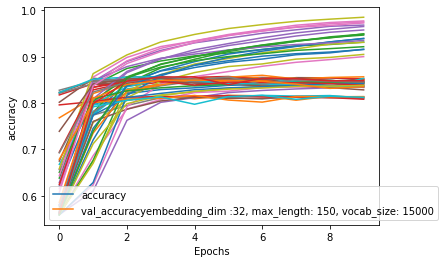

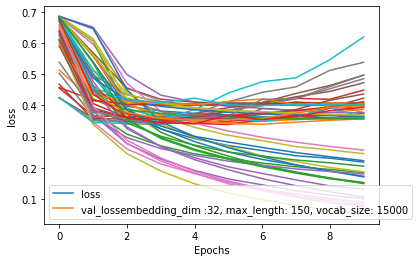

In [ ]:
import matplotlib.pyplot as plt

embedding_dims = [8, 16, 32]
max_lengths = [50, 100, 150]
vocab_sizes = [1000, 10000, 15000]

def plot_graphs(histories, string):
    hi = 0
    for embedding_dim in [8, 16, 32]:
        for max_length in [50, 100, 150]:
            for vocab_size in [1000, 10000, 15000]:
                history = histrories[hi]
                plt.plot(history.history[string])
                plt.plot(history.history['val_'+string])
                plt.xlabel("Epochs")
                plt.ylabel(string)
                leg = 'embedding_dim :' + str(embedding_dim) +', max_length: ' + str(max_length) + ', vocab_size: ' + str(vocab_size)
                plt.legend([string, 'val_'+string +leg])
                hi = hi+1
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
history.history["accuracy"][-1]

0.9934999942779541

In [ ]:
history.history["val_accuracy"][-1]

0.8153226971626282

In [ ]:
a =[]
for embedding_dim in [8, 16, 32]:
    print(embedding_dim)
    a.append(embedding_dim)
    print(a)


8
[8]
16
[8, 16]
32
[8, 16, 32]


In [ ]:
'x' +str(a)

'x[8, 16, 32]'

In [ ]:
for embedding_dim in [8, 16, 32]:
    for max_length in [50, 100, 150]:
        for vocab_size in [1000, 10000, 15000]:
            leg = 'embedding_dim :' + str(embedding_dim) + ', max_length: ' + str(max_length) + ', vocab_size: ' + str(vocab_size)
            print(leg)

embedding_dim :8, max_length: 50, vocab_size: 1000
embedding_dim :8, max_length: 50, vocab_size: 10000
embedding_dim :8, max_length: 50, vocab_size: 15000
embedding_dim :8, max_length: 100, vocab_size: 1000
embedding_dim :8, max_length: 100, vocab_size: 10000
embedding_dim :8, max_length: 100, vocab_size: 15000
embedding_dim :8, max_length: 150, vocab_size: 1000
embedding_dim :8, max_length: 150, vocab_size: 10000
embedding_dim :8, max_length: 150, vocab_size: 15000
embedding_dim :16, max_length: 50, vocab_size: 1000
embedding_dim :16, max_length: 50, vocab_size: 10000
embedding_dim :16, max_length: 50, vocab_size: 15000
embedding_dim :16, max_length: 100, vocab_size: 1000
embedding_dim :16, max_length: 100, vocab_size: 10000
embedding_dim :16, max_length: 100, vocab_size: 15000
embedding_dim :16, max_length: 150, vocab_size: 1000
embedding_dim :16, max_length: 150, vocab_size: 10000
embedding_dim :16, max_length: 150, vocab_size: 15000
embedding_dim :32, max_length: 50, vocab_size: 10